# Car Price Prediction

### Importing Necessary Libraries

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

# DATA EXPLORATION

In [136]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


##### Dataset Columns

In [137]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

##### Statistical Analysis of the Dataset

In [139]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


##### Shape of the Original Dataset

In [140]:
df.shape

(4340, 8)

##### Datatypes of each column

In [141]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

# FEATURE ENGINEERING

The **name** feature contains the model and sometimes additional details. We can extract the brand and model as separate features.

In [142]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])
df['model'] = df['name'].apply(lambda x: ' '.join(x.split()[1:3]))
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20 Magna
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20 Magna
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800 AC
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta 1.6


The **year** feature can be used as it is, but we can also create a new feature representing the age of the car by subtracting the year from the current year.

In [143]:
current_year = 2024
df['car_age_in_years'] = current_year - df['year']
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,car_age_in_years
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6,12
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX,10
...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20 Magna,10
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20 Magna,10
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800 AC,15
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta 1.6,8


In [144]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,car_age_in_years
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6,12
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX,10


##### Shape of Dataset after Feature Engineering

In [146]:
df.shape

(4340, 11)

# DATA VISUALIZATION

### Histogram

##### Count of Cars by Year

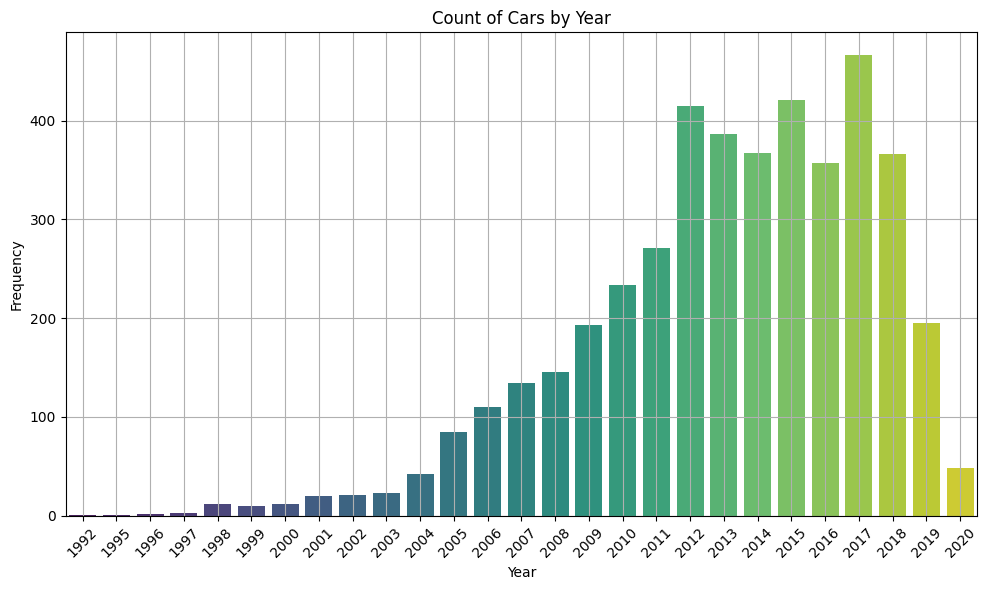

In [147]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Count of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Bar Charts

##### Counts of Cars by Seller Type and Fuel

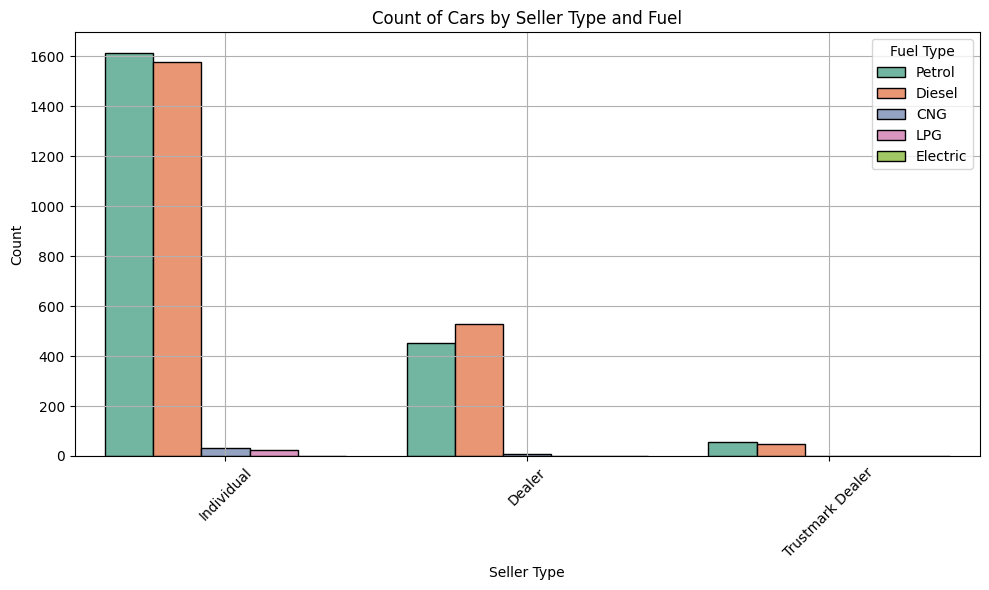

In [148]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x='seller_type', hue='fuel', data=df, palette='Set2', edgecolor='black')
plt.title('Count of Cars by Seller Type and Fuel')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Other Bar Graphs

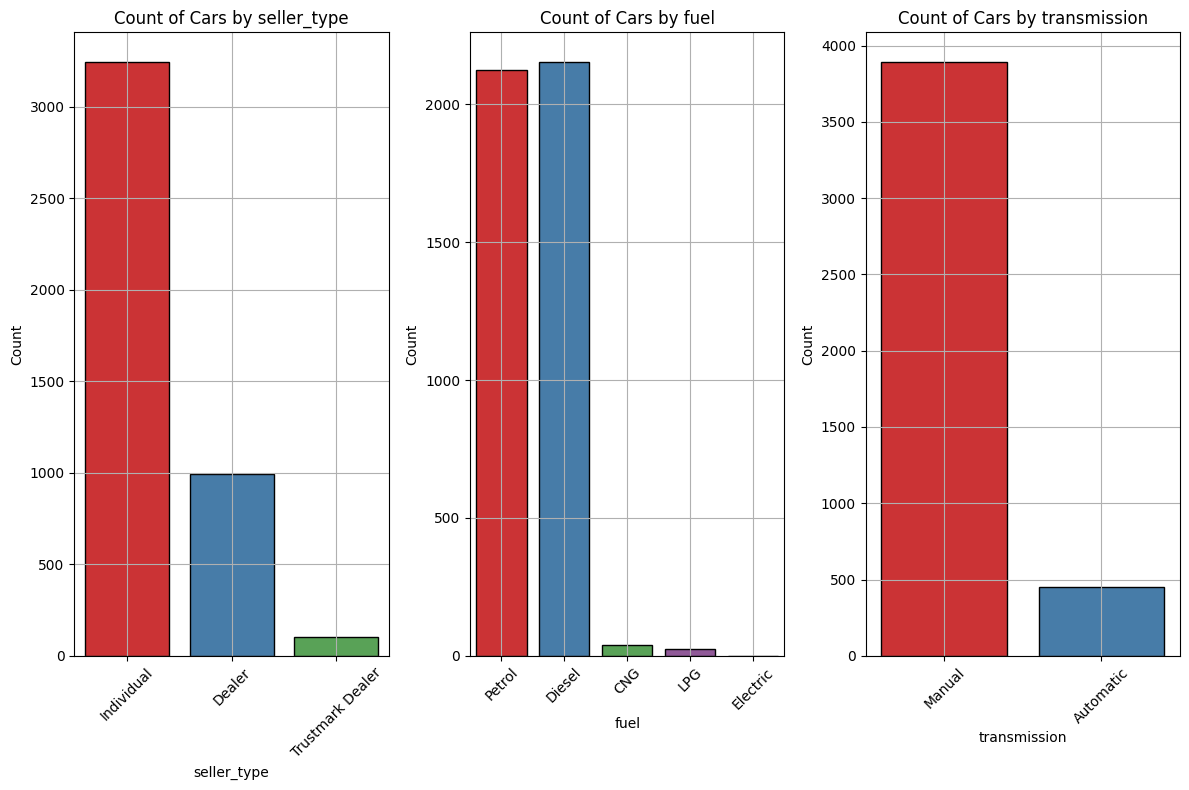

In [149]:
features = ['seller_type', 'fuel', 'transmission']  

plt.figure(figsize=(12, 8)) 

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.countplot(x=feature, data=df, palette='Set1', edgecolor='black')
    plt.title(f'Count of Cars by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Line Plot

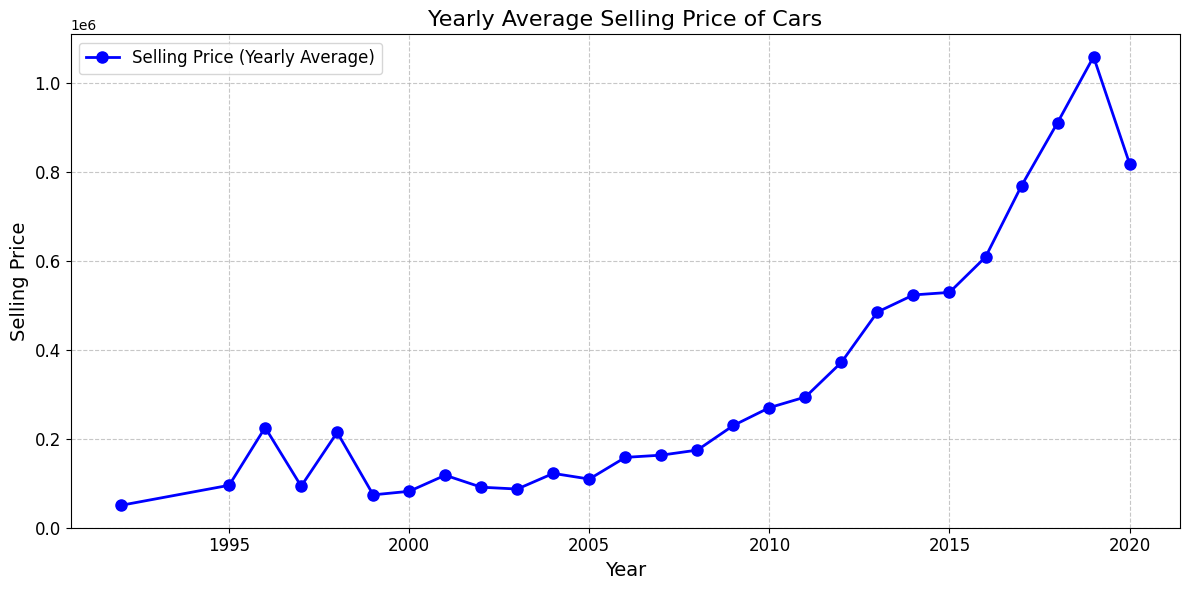

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

df_downsampled = df.groupby('year')['selling_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_downsampled['year'], df_downsampled['selling_price'], marker='o', linestyle='-', color='b', markersize=8, linewidth=2, label='Selling Price (Yearly Average)')
plt.title('Yearly Average Selling Price of Cars', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

##### Pi Chart

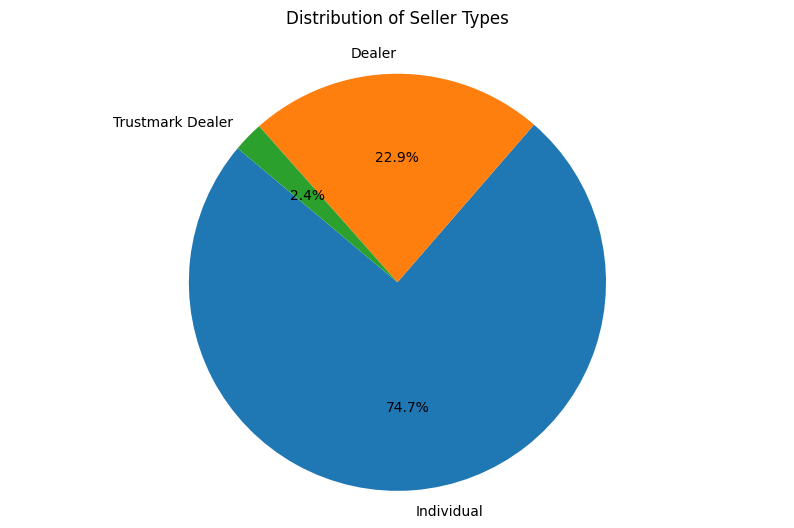

In [151]:
subtype_counts = df['seller_type'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(subtype_counts, labels=subtype_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Seller Types\n')
plt.axis('equal')
plt.show()

# DATA PREPARATION

### Defining Features and Target (Independant & Dependant Variables)

In [152]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

### Handling Missing Values

In [153]:
missing_data = df.isnull().sum()
print(missing_data)

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
brand               0
model               0
car_age_in_years    0
dtype: int64


As seen above, there are no missing values in the dataset.

### Encoding Categorical Columns

In [154]:
le = LabelEncoder()

for col in X:
    if X[col].dtypes == 'object':
        X[col] = le.fit_transform(X[col])

# MODEL SELECTION AND TRAINING

### Train Test Split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Car Price Prediction

For Car Price Prediction, We can use multiple algorithms, but we have used the following Regression models:

-  Linear Regression
-  Decision Tree Regressor
-  Random Forest Regressor

### Linear Regression

In [156]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

### Decision Tree Regressor

In [157]:
model_dt = DecisionTreeRegressor(random_state=42)

model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

### Random Forest Regressor

In [158]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# MODEL EVALUATION

### Linear Regression

In [159]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr) 
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")

Linear Regression:
Mean Squared Error (MSE): 185747906267.54
Root Mean Squared Error (RMSE): 430984.81
Mean Absolute Error (MAE): 250959.61


### Decision Tree Regressor

In [164]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt) 
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")

Decision Tree Regressor:
Mean Squared Error (MSE): 190024401947.83
Root Mean Squared Error (RMSE): 435917.88
Mean Absolute Error (MAE): 123976.16


### Random Forest Regressor

In [161]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf) 
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

Random Forest Regressor:
Mean Squared Error (MSE): 38880819145.33
Root Mean Squared Error (RMSE): 197182.20
Mean Absolute Error (MAE): 93690.22


# CROSS VALIDATION

In [162]:
k_folds = 3

cv_scores_lr = cross_val_score(model_lr, X, y, scoring='neg_mean_squared_error', cv=k_folds)
mse_scores_lr = -cv_scores_lr 

cv_scores_dt = cross_val_score(model_dt, X, y, scoring='neg_mean_squared_error', cv=k_folds)
mse_scores_dt = -cv_scores_dt

cv_scores_rf = cross_val_score(model_rf, X, y, scoring='neg_mean_squared_error', cv=k_folds)
mse_scores_rf = -cv_scores_rf 

avg_mse_lr = np.mean(mse_scores_lr)
avg_mse_dt = np.mean(mse_scores_dt)
avg_mse_rf = np.mean(mse_scores_rf)

print("Cross-Validation Results:")
print(f"Linear Regression - Average MSE: {avg_mse_lr:.2f}")
print(f"Decision Tree Regressor - Average MSE: {avg_mse_dt:.2f}")
print(f"Random Forest Regressor - Average MSE: {avg_mse_rf:.2f}")

Cross-Validation Results:
Linear Regression - Average MSE: 185284475225.59
Decision Tree Regressor - Average MSE: 111403965096.10
Random Forest Regressor - Average MSE: 70147809987.19


# NEW PREDICTION

In [163]:
model = RandomForestRegressor()
model.fit(X_train, y_train) 

X_new = [[775, 2007, 70000, 4, 1, 1, 0, 18, 6, 17]] 

y_pred = model.predict(X_new)

print(f"Predicted selling price: {y_pred}")

Predicted selling price: [63859.99]


C:\Users\AAC\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
